In [7]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


cols = ['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex',
        'capital-gain','capital_loss','hours-per-week','native-country','income']
        
adults_df = pd.read_csv('adult.data', names = cols)
adults_df.head()


,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital_loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Question 1

In [8]:
def one_hot_encoding():
    columns = ['occupation','race','sex']
    adults_df = pd.read_csv('adult.data', names = cols)
    adults_df = pd.get_dummies(adults_df, columns =columns, dtype = int)
    return adults_df

pd.set_option('display.max_columns', None)
adults_df = one_hot_encoding()
adults_df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,relationship,capital-gain,capital_loss,hours-per-week,native-country,income,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,2174,0,40,United-States,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,0,0,13,United-States,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,0,0,40,United-States,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,0,0,40,United-States,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,0,0,40,Cuba,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [9]:
adults_df.duplicated().any()

adults_df = adults_df.drop_duplicates()    
adults_df.duplicated().any()

False

In [10]:
adults_df['income'] = np.where(adults_df['income'].str.contains('>') ,1,0)
adults_df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,relationship,capital-gain,capital_loss,hours-per-week,native-country,income,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,2174,0,40,United-States,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,0,0,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,0,0,40,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,0,0,40,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,0,0,40,Cuba,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


#Question2

In [11]:
lr_df = adults_df[['hours-per-week','income']]
lr_df.head()
lr_df.corr()

,hours-per-week,income
hours-per-week,1.000000,0.229658
income,0.229658,1.000000


In [12]:
linX =lr_df[['hours-per-week']]
liny = lr_df['income']


linX_train, linX_test, liny_train, liny_test = train_test_split(linX, liny, 
                                                    test_size=0.3, 
                                                    random_state=32)
sc = StandardScaler()
linX_train = sc.fit_transform(linX_train)
linX_test = sc.fit_transform(linX_test)

In [13]:
lin_model = LinearRegression()
lin_model.fit(linX_train,liny_train)

liny_pred = lin_model.predict(linX_test)
liny_pred

array([0.40715573, 0.34902496, 0.24106781, ..., 0.32411177, 0.32411177,
       0.24106781])

In [14]:
lin_model.score(linX_test,liny_test)

0.04360003840167059

The model performed very badly. Linear Regression is not a good approach for this dataset becuase the outcome is a binary
data. And only using one feature is not enough data for the model to perform well

#Question 3

In [15]:
columns = ['occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Craft-repair','occupation_ Exec-managerial',
           'occupation_ Farming-fishing','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service',
           'occupation_ Priv-house-serv','occupation_ Prof-specialty','occupation_ Protective-serv','occupation_ Sales','occupation_ Tech-support',
           'occupation_ Transport-moving','race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other', 
           'race_ White','sex_ Female','sex_ Male','capital-gain','capital_loss','hours-per-week','education_num','age','income']
           
model_df = adults_df[columns]
model_df.head()


,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,capital-gain,capital_loss,hours-per-week,education_num,age,income
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2174,0,40,13,39,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,13,13,50,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,40,9,38,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,40,7,53,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,40,13,28,0


In [1]:
kX = model_df.drop('income', axis =1)
ky = model_df['income']

kX_train, kX_test, ky_train, ky_test = train_test_split(kX, ky, test_size = 0.3,
                                                    random_state=32,stratify = ky)

sc = StandardScaler()
kX_train = sc.fit_transform(kX_train)
kX_test = sc.fit_transform(kX_test)

knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(kX_train, ky_train)


y_predict = knn_model.predict(kX_test)
y_predict


NameError: name 'model_df' is not defined

In [41]:
knn_model.score(kX_test, ky_test)

0.8299528785085023

The knn model performed very well

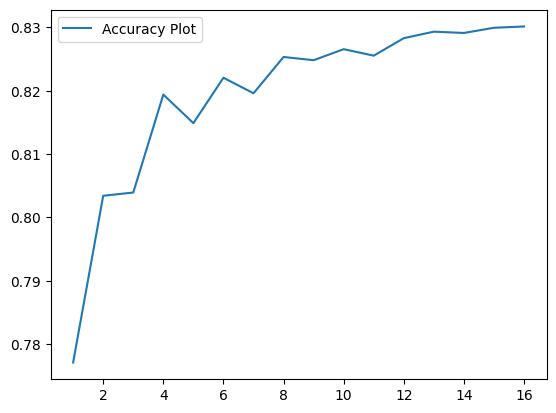

In [42]:
accuracy = []
neighbors = range(1,17,1)
for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(kX_train, ky_train)
    result = knn_model.score(kX_test, ky_test)
    accuracy.append(result)

plt.plot(neighbors, accuracy, label = 'Accuracy Plot')
plt.legend()

from the plot we can see the optimal odd number of neighbors would be 15

#Question 4

In [48]:
lgX = model_df.drop('income', axis =1)
lgy = model_df['income']

lgX_train, lgX_test, lgy_train, lgy_test = train_test_split(lgX, lgy, test_size = 0.3,
                                                    random_state=32,stratify = lgy)

sc = StandardScaler()
lgX_train = sc.fit_transform(lgX_train)
lgX_test = sc.fit_transform(lgX_test)

log_model =LogisticRegression(random_state=32).fit(lgX_train, lgy_train)
lgy_predict = log_model.predict(lgX_test)
lgy_predict

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
log_model.score(lgX_test, lgy_test)

0.8312845728334358

The logistic regeression model perfromed very well too its the best out of the three

#Question 6

In [45]:
#normlization for linear regression
scaler = MinMaxScaler()
linX_train = scaler.fit_transform(linX_train)
linX_test = scaler.fit_transform(linX_test)

lin_model.score(linX_test,liny_test)

-0.0022082959361693355

In [46]:
#normalization on knn
kX_train = scaler.fit_transform(kX_train)
kX_test = scaler.fit_transform(kX_test)
knn_model.score(kX_test,ky_test)

0.7626510960868674

In [50]:
#normalizatiion for logistic regression 
lgX_train = scaler.fit_transform(lgX_train)
lgX_test = scaler.fit_transform(lgX_test)

log_model.score(lgX_test, lgy_test)

0.8182749436590863

#all the models got worse after normalization but logistic regression was only marginaly affected
while the other two had big dips in performance.
Since there is no worse scenario between false positives and false negatives accuracy wuld be the best 
measure for this data.